thinking1:参数共享指的是什么？
答：是指在神经网络中使用同一个卷积核对一张图片或者说一个矩阵做特征提取时，这个图片会都使用这同一个卷积核的权重参数，卷积核通过窗体平移的方式对这个图片做处理来提取图片的特征，这样下一层的输入参数会进行降维减少，每一层神经网络都会有多个卷积核来对输入图片进行不同方向或者层次的特征提取，从而最大保留图片的特征传递到下一层。

thinking2:为什么会用到batch normalization ?
答：batch normalization就是对输入数据进行标准话处理，消除量纲对数据的影响，因为神经网络中的各项偏差在传递的过程中都会相乘，所以偏差在传递的过程中影响就会变大，会导致神经网络学习训练过程中收敛速度变慢，加batch normalization就相当于将数据拉回均值为0的正态分布，加快收敛速度。

thinking3:使用dropout可以解决什么问题？
答：dropout可以解决神经网络中的过拟合问题，它的原理是在神经网络的前向传播和反向传播中，会有一些神经元有一定的概率失效，这样的话一是避免了在训练过程中对某个神经元的强依赖问题，另一个也同时也可以降低网络的复杂度，加快学习速度。

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
#train_data=torchvision.datasets.CIFAR10(root='G:\\python_lesson\\L7-code\\code',train=True,transform=torchvision.transforms.ToTensor(),download=True)
#test_data=torchvision.datasets.CIFAR10(root='G:\\python_lesson\\L7-code\\code',train=False,transform=torchvision.transforms.ToTensor(),download=True)
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  #先四周填充0，在吧图像随机裁剪成32*32
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #R,G,B每层的归一化用到的均值和方差
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
train_data=torchvision.datasets.CIFAR10(root='G:\\python_lesson\\L7-code\\code',train=True,transform=transform_train,download=True)
test_data=torchvision.datasets.CIFAR10(root='G:\\python_lesson\\L7-code\\code',train=False,transform=transform_test,download=True)



Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 32, 32)


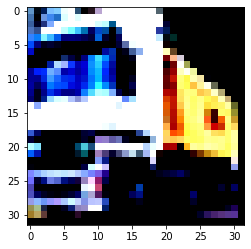

In [ ]:
import matplotlib.pyplot as plt
temp=train_data[1][0].numpy()
print(temp.shape)
temp=temp.transpose(1,2,0)
#imshow传入的格式为(M, N, 3)，通道数在最后一个轴上，所以前面要做格式转换
plt.imshow(temp)

In [ ]:

EPOCH=50
LR=0.1
BATCH_SIZE=128
train_loader=torch.utils.data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_data,batch_size=BATCH_SIZE)
#使用别人已经预训练好的模型参数进行进一步训练
model=torchvision.models.resnet18(pretrained=True)

epoch:1 loss: 1.9996 time 19.0235
epoch:2 loss: 1.5279 time 19.1846
epoch:3 loss: 1.4495 time 19.0238
epoch:4 loss: 1.3178 time 18.9185
epoch:5 loss: 1.3956 time 19.2279
epoch:6 loss: 1.0517 time 19.1474
epoch:7 loss: 1.0421 time 19.0795
epoch:8 loss: 0.9770 time 19.0007
epoch:9 loss: 0.9543 time 18.7511
epoch:10 loss: 0.9775 time 18.9875
epoch:11 loss: 0.8118 time 18.8408
epoch:12 loss: 0.9930 time 18.6092
epoch:13 loss: 1.0780 time 18.8316
epoch:14 loss: 0.9095 time 18.5349
epoch:15 loss: 0.8057 time 18.6341
epoch:16 loss: 0.7829 time 18.6664
epoch:17 loss: 0.5786 time 18.6054
epoch:18 loss: 0.7840 time 18.7018
epoch:19 loss: 0.6802 time 18.4868
epoch:20 loss: 0.6830 time 18.5874
epoch:21 loss: 0.5789 time 18.6398
epoch:22 loss: 0.7140 time 18.8332
epoch:23 loss: 0.5715 time 18.7156
epoch:24 loss: 0.7746 time 18.5951
epoch:25 loss: 0.6725 time 18.6964
epoch:26 loss: 0.7289 time 18.4827
epoch:27 loss: 0.7583 time 18.7448
epoch:28 loss: 0.6341 time 18.5442
epoch:29 loss: 0.7068 time 18

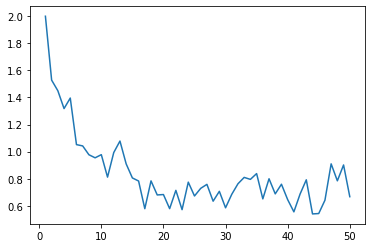

In [ ]:
import time as time
import numpy as np
criterion=nn.CrossEntropyLoss()
#optimizer=optim.Adam(model.parameters(),lr=LR)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=5e-4)
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
xx=[]
yy=[]
for epoch in range(EPOCH):
    start_time=time.time()
    for i ,data in enumerate(train_loader):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
   # print(epoch+1)
    print('epoch:{} loss:{: .4f} time{: .4f}'.format(epoch+1,loss.item(),time.time()-start_time))
    xx.append(epoch+1)
    yy.append(loss.item())
a=np.array(xx)
b=np.array(yy)
print("loss的变化情况")
plt.plot(a, b)        

In [ ]:
file_name='cifa10_resnet.pt'
torch.save(model,file_name)
print(file_name+' saved')

cifa10_resnet.pt saved


In [ ]:
model=torch.load(file_name)
model.eval()
correct,total=0,0

for i,data in enumerate(test_loader):
    images,labels=data
    images,labels=images.to(device),labels.to(device)
    out=model(images)
    _,predicted=torch.max(out.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
print('10000张测试图像准确率：{: .4f}%'.format(100.0*correct/total))

#net34 EPOCH=100 LR=0.001 准确率 80.9800%






10000张测试图像准确率： 74.6500%


##net34 EPOCH=85 LR=0.001 准确率 80.7900%

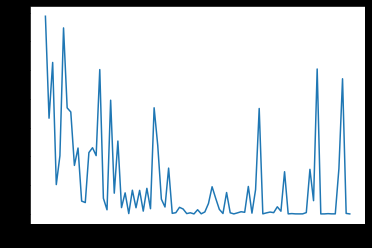

##net34 EPOCH=40 LR=0.001 准确率 80.5100%

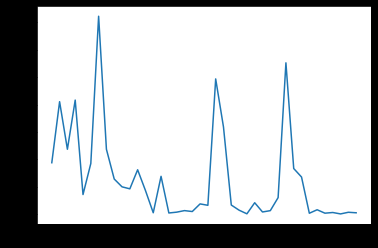

##net18 EPOCH=50 LR=0.001 准确率80.9000%


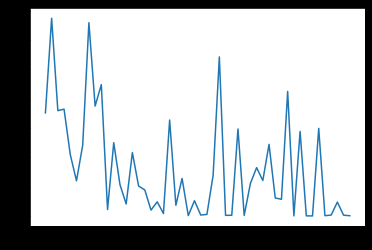

##net18 EPOCH=50 LR=0.01 准确率74.2700%


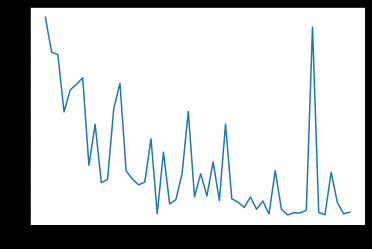

##net18 EPOCH=50 LR=0.005 准确率73.1000%

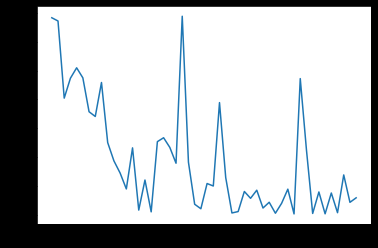

##resnet18 EPOCH=150 LR=0.0001 准确率84.0200%

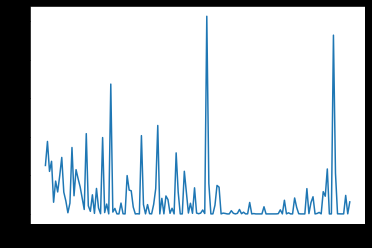

##resnet18 优化器optim.SGD EPOCH=20 LR=0.001 准确率81.5100%


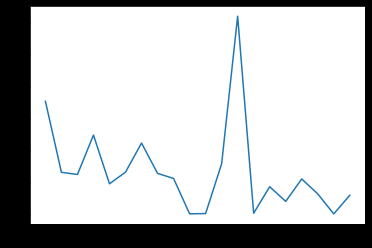

##数据添加预处理环节 resnet18 优化器optim.SGD EPOCH=50 LR=0.1 准确率74.6500%

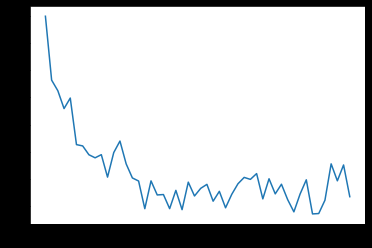

##实验部分总结：
resnet34在测试的实验结果来看，它的预测效果没有比resnet18更好，说明并不一定是网络结构层数越深越好。上面几个测试结果最好的准确率是84.02%。从最后一个实验可以看到，对图像进行预处理，包括剪裁翻转等，会使得模型在训练的过程中loss的下降相对平稳，不会像之前抖动的那么厉害，可能在这个数据预处理之后，增加学习epoch，减小学习率能够获得比84%更好的结果吧。（没有时间跑了。。。）